# 1. 데이터 읽어오기

In [1]:
import pandas as pd
import numpy as np
import random
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

# 2. 데이터 확인

In [3]:
train.head()

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0


## 1) 결측값 

In [4]:
train.isna().sum()

ID                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,3.923313,120.946319,68.895706,20.440184,80.878834,31.947393,0.465133,33.510736,0.349693
std,3.327529,31.992394,19.183843,15.918604,117.748315,7.460975,0.329496,11.824817,0.477239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.238750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.363000,29.500000,0.000000
75%,6.000000,142.000000,80.000000,32.000000,126.000000,36.425000,0.607750,41.000000,1.000000
max,15.000000,199.000000,114.000000,99.000000,846.000000,57.300000,2.329000,81.000000,1.000000


## 2) target(Outcome)의 빈도 및 비율 확인 

In [6]:
train['Outcome'].value_counts()

0    424
1    228
Name: Outcome, dtype: int64

In [7]:
# normalize 인자의 값을 True를 설정하여 비율 확인
train['Outcome'].value_counts(normalize = True)

0    0.650307
1    0.349693
Name: Outcome, dtype: float64

## 3) feature 변수의 분포 확인

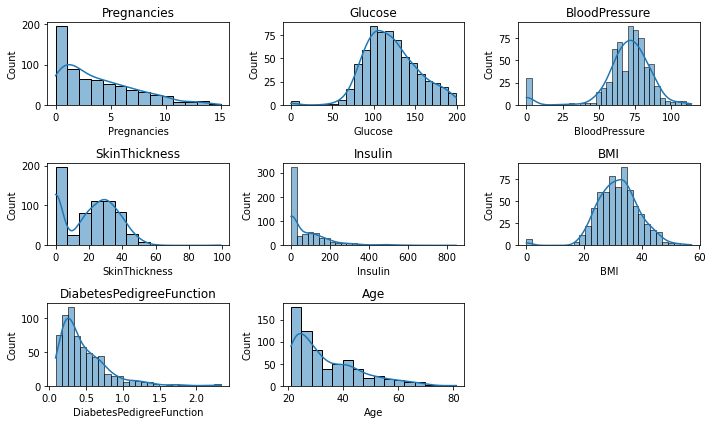

In [43]:
features = train.columns[1:-1 ]

plt.figure(figsize=(10,6))

for idx, feature in enumerate(features):
  ax1 = plt.subplot(3,3,idx+1)
  plt.title(feature)
  plt.tight_layout()
  sns.histplot(x=feature, data = train,kde=True)

plt.show()

## 4) feature들의 target class별 빈도수 시각화

<Figure size 576x288 with 0 Axes>

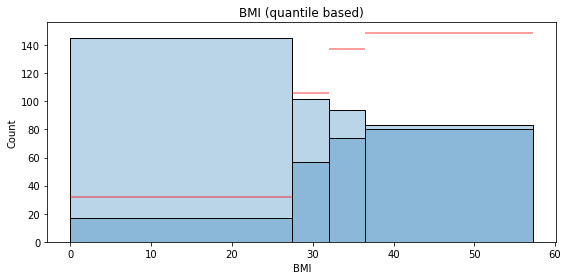

In [44]:
selected_feature = 'BMI'  # 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'

plt.figure(figsize=(8,4))

# 사분위 수 계산
q1 = np.percentile(train[selected_feature], 25)
q2 = np.percentile(train[selected_feature], 50)
q3 = np.percentile(train[selected_feature], 75)
q4 = np.percentile(train[selected_feature], 100)

q_lst = [ 0, q1, q2, q3, q4]

# target class 1의 갯수 대비 target class 0의 갯수의 비율 구하기
num_class0 = len(train [ train['Outcome'] == 0 ])
num_class1 = len(train [ train['Outcome'] == 1 ])

ratio_class1_class0 = num_class0 / num_class1

# 히스토그램 그리기
plt.figure(figsize=(8, 4))
h0_ax1 = sns.histplot(data=train[train['Outcome'] == 0], x=selected_feature, bins = q_lst,  alpha=0.3,  label='Outcome = 0')
h1_ax1 = sns.histplot(data=train[train['Outcome'] == 1], x=selected_feature, bins = q_lst,  alpha=0.3,  label='Outcome = 1')

# target 변수의 class가 1일 때의 각 bin의 높이(개수)와 경계값을 얻어옵니다
h1_heights, h1_edges = np.histogram(train[train['Outcome'] == 1][selected_feature], bins=q_lst)

# target class 1의 갯수 대비 target class 0의 갯수의 비율과 일치하는 각 구간의 수평선을 그린다
for i in range(len(h1_heights)):
    plt.hlines(y=h1_heights[i] * ratio_class1_class0 , xmin=h1_edges[i], xmax=h1_edges[i+1], linestyles='solid', colors='red', alpha=0.5)

plt.gca().set_title(f"{selected_feature} (quantile based)")

plt.tight_layout()
plt.show()

## 5) feature들의 분포 및 이상치 탐색

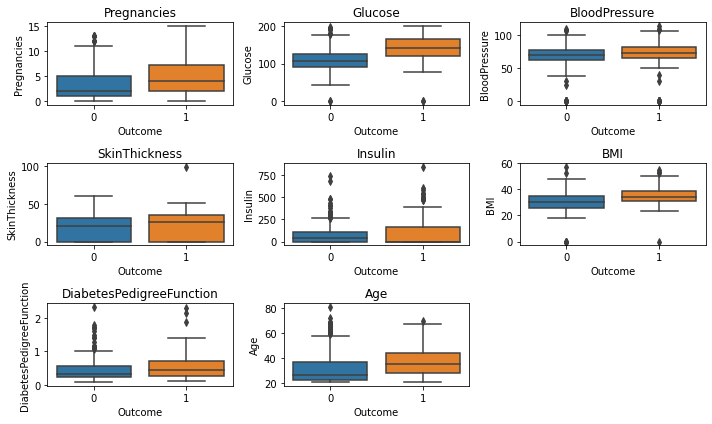

In [45]:
features = train.columns[1:-1 ]

plt.figure(figsize=(10,6))

for idx, feature in enumerate(features):
  ax1 = plt.subplot(3,3,idx+1)
  plt.title(feature)
  plt.tight_layout()
  sns.boxplot(x='Outcome', y=feature, data = train)

plt.show()

## 6) feature 변수쌍과 target과의 연관관계 시각화

<Figure size 216x144 with 0 Axes>

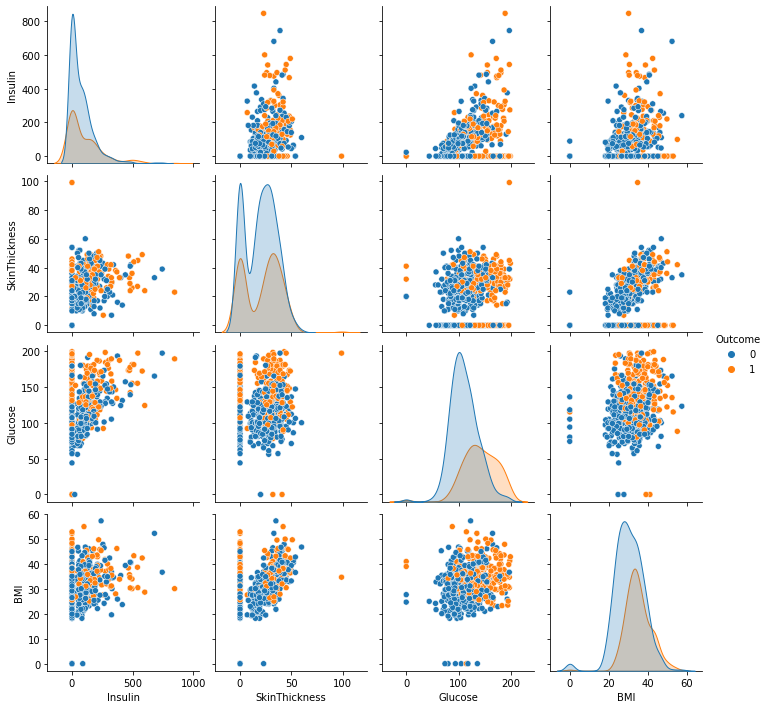

In [46]:
plt.figure(figsize=(3,2))

#features_to_analyze = train.columns[1:]
features_to_analyze = ['Insulin', 'SkinThickness', 'Glucose', 'BMI', 'Outcome']
sns.pairplot(train[features_to_analyze], hue='Outcome')

plt.show()

## 7) 수치형 feature와 이진 범주형 target간의 상관관계

In [47]:
from scipy.stats import pointbiserialr

correlation_org_lst, correlation_dealout_lst = [], []
p_value_org_lst, p_value_dealout_lst = [], []

feature_lst = train.columns[1:-1].to_list()

# 점 이연 상관계수 계산 및 출력
for feature in feature_lst:
    correlation_org, p_value_org = pointbiserialr (train[feature], train['Outcome'])
    correlation_org_lst.append(correlation_org)
    p_value_org_lst.append(p_value_org)


# 데이터프레임 생성
correlation_dict = {'Feature': feature_lst,
                    'correlation_org': correlation_org_lst,
                    'p_value_org' : p_value_org_lst }

correlation_df = pd.DataFrame(correlation_dict)

display(correlation_df)

,Feature,correlation_org,p_value_org
0,Pregnancies,0.211340,5.102077e-08
1,Glucose,0.460108,1.798069e-35
2,BloodPressure,0.049459,2.072204e-01
3,SkinThickness,0.052094,1.840018e-01
4,Insulin,0.123246,1.616097e-03
5,BMI,0.294390,1.676326e-14
6,DiabetesPedigreeFunction,0.173584,8.283545e-06
7,Age,0.218183,1.818929e-08


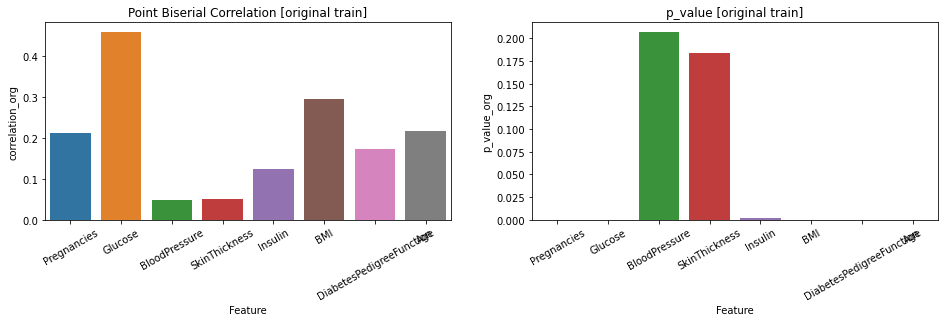

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
# Seaborn barplot

plt.figure(figsize=(16, 8))

plt.subplot(2,2,1)
sns.barplot(x='Feature', y='correlation_org', data=correlation_df)
plt.gca().set_title("Point Biserial Correlation [original train]")
plt.gca().set_xticklabels(feature_lst, rotation=30)

plt.subplot(2,2,2)
sns.barplot(x='Feature', y='p_value_org', data=correlation_df)
plt.gca().set_xticklabels(feature_lst, rotation=30)
plt.gca().set_title("p_value [original train]")

plt.show()

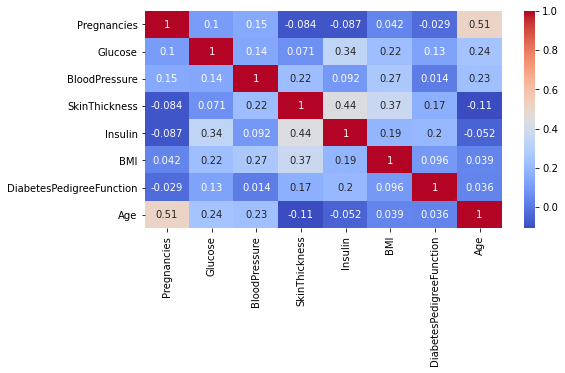

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

features = train.columns[1:-1]
# 이번 셀에서 출력할 이미지 크기를 지정합니다.
plt.figure(figsize = (8,4))

# annot을 False로 설정하면 각 셀의 수치가 표기되지 않습니다.
sns.heatmap(train[features].corr(), cmap = "coolwarm", annot = True)
plt.show()

## 8) 다중 공선성과 VIF

,features,VIF
0,Pregnancies,3.258236
1,Glucose,16.758235
2,BloodPressure,14.606656
3,SkinThickness,3.905130
4,Insulin,2.064910
5,BMI,18.905627
6,DiabetesPedigreeFunction,3.119245
7,Age,12.800928


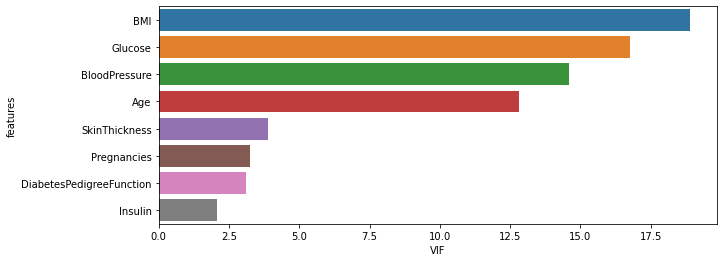

In [50]:
# Import required libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

features_org = train.columns[1:-1]
train_x = train[features_org]

vif = pd.DataFrame()
vif["features"] = train_x.columns

# 빈 리스트를 생성합니다.
VIF_list = []

# 각 피처에 대해 반복합니다.
for i in range(len(train_x.columns)):

    # variance_inflation_factor 함수를 사용하여 해당 피처의 VIF 값을 계산합니다.
    VIF_value = variance_inflation_factor(train_x.values, i)

    # 계산된 VIF 값을 리스트에 추가합니다.
    VIF_list.append(VIF_value)

# VIF 값 리스트를 DataFrame에 추가합니다.
vif["VIF"] = VIF_list

display(vif)

# Set the figure size
plt.figure(figsize=(10, 4))

# Create a bar plot of VIF values
sns.barplot(x="VIF", y="features", data=vif.sort_values("VIF", ascending=False))

# Show the plot
plt.show() 

# 3. EDA

## 1)  기본 교차 검증 성능

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix

features_org = train.columns[1:-1]

train_x = train[features_org]
train_y = train['Outcome']

kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

display("#######  기본 교차 검증 성능  #########")

RF_model = RandomForestClassifier(random_state = 42)
cv_result = cross_validate(RF_model, train_x, train_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result = pd.DataFrame(cv_result, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result)
display(df_cv_result.describe().loc['mean',:].to_frame().T)

'#######  기본 교차 검증 성능  #########'

,test_accuracy,test_precision,test_recall,test_f1
0,0.736196,0.652174,0.526316,0.582524
1,0.736196,0.640000,0.561404,0.598131
2,0.730061,0.666667,0.456140,0.541667
3,0.742331,0.631579,0.631579,0.631579


,test_accuracy,test_precision,test_recall,test_f1
mean,0.736196,0.647605,0.54386,0.588475


## 2)  z_score 기반의 이상치 제거 및 교차 검증 성능 변화 확인

In [59]:
from scipy import stats

# Z-score 기반 이상치 제거
z_scores = np.abs(stats.zscore (train_x))

threshold = 3  # 이 값을 조절하여 이상치로 간주되는 임계점을 설정합니다.
train_zscore = train.copy()[(z_scores  < threshold).all(axis=1)]

display(f"z_score 기반의 이상치 제거한 갯수 : {len(train) - len(train_zscore)} 개, 비율 : {(len(train) - len(train_zscore))/len(train) * 100.0}")

# 데이터 업데이트
train_zscore_x = train_zscore[features_org]
train_zscore_y = train_zscore['Outcome']

display("####### Z-score 기반 이상치 제거 후 교차 검증 성능 #########")

RF_model = RandomForestClassifier(random_state=42)
cv_result_zscore = cross_validate(RF_model, train_zscore_x, train_zscore_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_zscore = pd.DataFrame(cv_result_zscore, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])


display(df_cv_result_zscore)
display(df_cv_result_zscore.describe().loc['mean',:].to_frame().T)

'z_score 기반의 이상치 제거한 갯수 : 69 개, 비율 : 10.582822085889571'

'####### Z-score 기반 이상치 제거 후 교차 검증 성능 #########'

,test_accuracy,test_precision,test_recall,test_f1
0,0.767123,0.684211,0.541667,0.604651
1,0.739726,0.656250,0.437500,0.525000
2,0.739726,0.647059,0.458333,0.536585
3,0.827586,0.789474,0.638298,0.705882


,test_accuracy,test_precision,test_recall,test_f1
mean,0.76854,0.694248,0.518949,0.59303


## 3)  feature pair의 조합 연산 통한 새로운 feature 생성

In [66]:
import itertools

# 기존 피처의 조합을 생성하고, 새로운 피처를 추가한 후 각 조합에 대한 교차 검증 점수를 계산합니다.
# 그 중에서 가장 높은 정확도를 가진 피처만 선택합니다.

# RandomForest 모델과 KFold 객체를 생성합니다.
rf_model = RandomForestClassifier(random_state = 42)


# 주어진 피처의 조합을 생성합니다.
features_subset = ['Insulin', 'Age', 'BMI']
feature_combinations = list(itertools.combinations(features_subset, 2))

cv_scores = {}
for feature_pair in feature_combinations:
    feature1, feature2 = feature_pair

    train_try = train_zscore_x.copy()

    # 새로운 피처를 추가합니다.
    train_try[f'{feature1}_{feature2}_Diff'] = train_try[feature1] - train_try[feature2]
    train_try[f'{feature1}_{feature2}_Sum'] = train_try[feature1] + train_try[feature2]
    train_try[f'{feature1}_{feature2}_Ratio'] = train_try[feature1] / (train_try[feature2].replace(0, train_try[feature2].median()))

    features_to_evaluate = [f'{feature1}_{feature2}_Diff', f'{feature1}_{feature2}_Sum', f'{feature1}_{feature2}_Ratio']

    # 각 피처에 대한 교차 검증 점수를 계산합니다.
    feature_scores = {}
    for feature in features_to_evaluate:
        scores = cross_val_score(rf_model, pd.concat([train_zscore_x, train_try[feature]], axis=1), train_zscore_y, cv=kf, scoring='accuracy')
        feature_scores[feature] = scores.mean()

    # 가장 높은 점수를 가진 피처만 선택합니다.
    best_feature = max(feature_scores, key=feature_scores.get)
    cv_scores[best_feature] = feature_scores[best_feature]
    display(f"cv_scores[{best_feature}] : {cv_scores[best_feature]}")

# 점수를 기준으로 정렬합니다.

# 먼저, cv_scores 딕셔너리의 각 항목을 리스트로 변환합니다.
items = list(cv_scores.items())

# 그 다음, 이 리스트를 정렬합니다. 각 항목은 (key, value) 쌍이므로, item[1]을 사용하여 값을 기준으로 정렬합니다.
sorted_items = sorted(items, key=lambda item: item[1], reverse=True)

# 이제 이 정렬된 리스트를 다시 딕셔너리로 변환합니다.
cv_scores = dict(sorted_items)

display(cv_scores)

'cv_scores[Insulin_Age_Sum] : 0.7839631554085971'

'cv_scores[Insulin_BMI_Ratio] : 0.7822626358053849'

'cv_scores[Age_BMI_Ratio] : 0.7668162494095419'

{'Insulin_Age_Sum': 0.7839631554085971,
 'Insulin_BMI_Ratio': 0.7822626358053849,
 'Age_BMI_Ratio': 0.7668162494095419}

## 4)  feature pair의 조합 연산 통한 feature 추가하여 교차 검증 성능 확인

In [62]:
from sklearn.ensemble import RandomForestClassifier

# 피쳐 생성
train_try = train_zscore.copy()

train_try['Insulin_Age_Sum'] = train_try['Insulin'] + train_try['Age']

train_try['BMI'] = train_try['BMI'].replace(0, train_try['BMI'].median())
train_try['Insulin_BMI_Ratio'] = train_try['Insulin'] / train_try['BMI']

# 피쳐 추가
train_prep = train_zscore.copy()
train_prep['Insulin_Age_Sum'] = train_try['Insulin_Age_Sum']
train_prep['Insulin_BMI_Ratio'] = train_try['Insulin_BMI_Ratio']

train_prep_y= train_prep['Outcome']
train_prep_x = train_prep.drop(['ID', 'Outcome'], axis=1)

RF_model_prep = RandomForestClassifier(random_state=42)
cv_result_prep = cross_validate(RF_model_prep, train_prep_x, train_zscore_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_prep = pd.DataFrame(cv_result_prep, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_prep)
display(df_cv_result_prep.describe().loc['mean',:].to_frame().T)

display(train_prep_x.head(5))

,test_accuracy,test_precision,test_recall,test_f1
0,0.773973,0.702703,0.541667,0.611765
1,0.773973,0.741935,0.479167,0.582278
2,0.739726,0.625000,0.520833,0.568182
3,0.841379,0.800000,0.680851,0.735632


,test_accuracy,test_precision,test_recall,test_f1
mean,0.782263,0.71741,0.555629,0.624464


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_Age_Sum,Insulin_BMI_Ratio
0,4,103,60,33,192,24.0,0.966,33,225,8.000000
1,10,133,68,0,0,27.0,0.245,36,36,0.000000
2,4,112,78,40,0,39.4,0.236,38,38,0.000000
3,1,119,88,41,170,45.3,0.507,26,196,3.752759
4,1,114,66,36,200,38.1,0.289,21,221,5.249344


## 5) 결측치(0)

In [9]:
features_to_check = ['SkinThickness', 'Insulin', 'Glucose', 'BMI', 'BloodPressure']

for feature in features_to_check:
    n_missing = len(train[train[feature] == 0])
    ratio_missing = round(n_missing / len(train) * 100.0, 1)
    print(f"{feature} 결측치 갯수 : {n_missing}/{len(train)} ({ratio_missing})%")

SkinThickness 결측치 갯수 : 195/652 (29.9)%
Insulin 결측치 갯수 : 318/652 (48.8)%
Glucose 결측치 갯수 : 4/652 (0.6)%
BMI 결측치 갯수 : 7/652 (1.1)%
BloodPressure 결측치 갯수 : 30/652 (4.6)%


## train, test data의 결측치 분포 비교

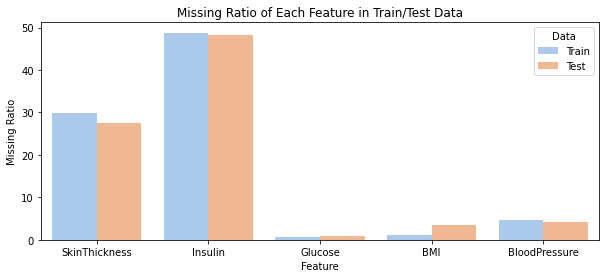

In [10]:
# seaborn의 색상 팔레트를 변경합니다.
sns.set_palette('pastel')

# Train 데이터의 결측치 비율을 계산합니다.
missing_ratio_train = []
for feature in features_to_check:
    n_missing = len(train[train[feature] == 0])
    ratio_missing = round(n_missing / len(train) * 100.0, 1)
    missing_ratio_train.append(ratio_missing)

# Test 데이터의 결측치 비율을 계산합니다.
missing_ratio_test = []
for feature in features_to_check:
    n_missing = len(test[test[feature] == 0])
    ratio_missing = round(n_missing / len(test) * 100.0, 1)
    missing_ratio_test.append(ratio_missing)

# 각각의 데이터프레임으로 변환합니다.
missing_df_train = pd.DataFrame({'Feature': features_to_check, 'Missing Ratio': missing_ratio_train, 'Data': 'Train'})
missing_df_test = pd.DataFrame({'Feature': features_to_check, 'Missing Ratio': missing_ratio_test, 'Data': 'Test'})

# 두 데이터프레임을 합쳐서 새로운 데이터프레임을 만듭니다.
missing_df = pd.concat([missing_df_train, missing_df_test])

# 시각화를 합니다.
plt.figure(figsize=(10, 4))
sns.barplot(x='Feature', y='Missing Ratio', hue='Data', data=missing_df)
plt.title('Missing Ratio of Each Feature in Train/Test Data')
plt.show()

## 6) Insulin

## Insulin 결측치 그룹과 정상 그룹 간 다른 피처들의 결측치 비율 비교

,Feature,Missing Insulin,Normal Insulin
0,SkinThickness,61.320755,0.000000
1,Glucose,0.943396,0.299401
2,BMI,1.886792,0.299401
3,BloodPressure,9.433962,0.000000


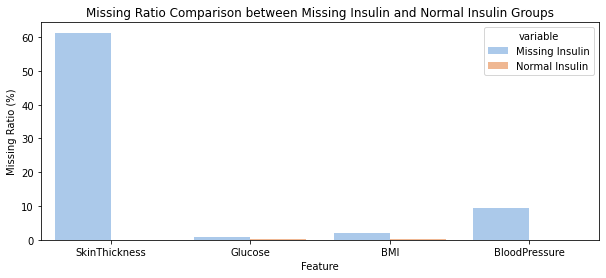

In [11]:
# 'Insulin'이 결측치인 데이터와 결측치가 아닌 데이터를 분리
train_missing_insulin = train[train['Insulin'] == 0]
train_normal_insulin = train[train['Insulin'] != 0]

# 'Insulin'을 제외한 피처 리스트
features_to_check = ['SkinThickness', 'Glucose', 'BMI', 'BloodPressure']


# 각 데이터 프레임에 대한 결측치 비율 계산
missing_insulin_ratios = [len(train_missing_insulin[train_missing_insulin[feature] == 0]) / len(train_missing_insulin) * 100.0 for feature in features_to_check]
normal_insulin_ratios = [len(train_normal_insulin[train_normal_insulin[feature] == 0]) / len(train_normal_insulin) * 100.0 for feature in features_to_check]

# 데이터 프레임 생성
df_missing_ratios = pd.DataFrame({
    'Feature': features_to_check,
    'Missing Insulin': missing_insulin_ratios,
    'Normal Insulin': normal_insulin_ratios
})

display(df_missing_ratios)

# 데이터 프레임을 긴 형식(long format)으로 변경
df_missing_ratios_melted = df_missing_ratios.melt(id_vars='Feature', value_vars=['Missing Insulin', 'Normal Insulin'])

# 시각화
plt.figure(figsize=(10, 4))
sns.barplot(x='Feature', y='value', hue='variable', data=df_missing_ratios_melted)
plt.ylabel('Missing Ratio (%)')
plt.title('Missing Ratio Comparison between Missing Insulin and Normal Insulin Groups')
plt.show()

## Insulin 결측치 데이터셋과 정상 데이터셋의 각 feature의 분포 비교

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


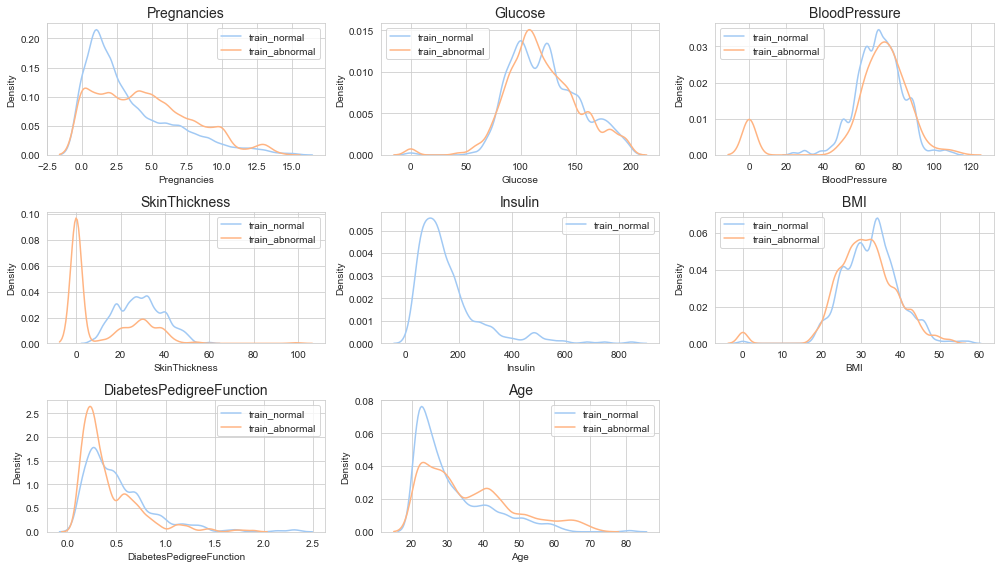

In [12]:
features_org = train.columns[1:-1]

# 특성들의 분포를 시각화하기 위한 함수
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure(figsize=(14,8))
    for feature in features:
        i += 1
        plt.subplot(3,3,i)
        sns.kdeplot(df1[feature], bw_adjust=0.5, label=label1)
        sns.kdeplot(df2[feature], bw_adjust=0.5, label=label2)
        plt.title(feature, fontsize=14)
        plt.legend()
    plt.tight_layout()
    plt.show()

# train_normal과 train_abnormal 데이터셋의 특성 분포 시각화
plot_feature_distribution(train_normal_insulin, train_missing_insulin, "train_normal", "train_abnormal", features_org)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix

features = train.columns[1:-1]

train_normal_insulin_x = train_normal_insulin[features]
train_noraml_insulin_y = train_normal_insulin['Outcome']

train_missing_insulin_x = train_missing_insulin[features].drop('Insulin', axis=1)
train_missing_insulin_y = train_missing_insulin['Outcome']

kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

display("#######  Insulin 결측치 없는 데이터셋  #########")

RF_model_normal = RandomForestClassifier(random_state = 42)
cv_result_normal = cross_validate(RF_model_normal, train_normal_insulin_x, train_noraml_insulin_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_normal = pd.DataFrame(cv_result_normal, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_normal)
display(df_cv_result_normal.describe().loc['mean',:].to_frame().T)

display("#######  Insulin 결측치 데이터셋  #########")

RF_model_abnormal = RandomForestClassifier(random_state = 42)
cv_result_abnormal = cross_validate(RF_model_abnormal, train_missing_insulin_x, train_missing_insulin_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_abnormal = pd.DataFrame(cv_result_abnormal, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_abnormal)
display(df_cv_result_abnormal.describe().loc['mean',:].to_frame().T)

'#######  Insulin 결측치 없는 데이터셋  #########'

,test_accuracy,test_precision,test_recall,test_f1
0,0.821429,0.772727,0.629630,0.693878
1,0.773810,0.666667,0.592593,0.627451
2,0.807229,0.777778,0.538462,0.636364
3,0.759036,0.652174,0.555556,0.600000


,test_accuracy,test_precision,test_recall,test_f1
mean,0.790376,0.717336,0.57906,0.639423


'#######  Insulin 결측치 데이터셋  #########'

,test_accuracy,test_precision,test_recall,test_f1
0,0.762500,0.761905,0.533333,0.627451
1,0.712500,0.642857,0.580645,0.610169
2,0.683544,0.600000,0.500000,0.545455
3,0.734177,0.655172,0.633333,0.644068


,test_accuracy,test_precision,test_recall,test_f1
mean,0.72318,0.664984,0.561828,0.606786


## 인슐린 결측치가 없는 정상 train 데이터(train_normal) 추출

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# feature set 정의
features_org = list(train.columns)[1:-1]

#  train 데이터에서 Insulin이 0이 아닌 데이터 추출
train_normal = train.copy()
train_normal = train_normal.loc[train_normal['Insulin'] != 0]

train_normal_x = train_normal[features_org]
train_normal_y = train_normal['Outcome']

display(train_normal.head(5))

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0
5,TRAIN_005,3,78,50,32,88,31.0,0.248,26,1
6,TRAIN_006,1,91,54,25,100,25.2,0.234,23,0


##  z_score 기반의 이상치 제거

In [15]:
from scipy import stats

features_org = train.columns[1:-1]
train_normal_x = train_normal[features_org]

# Z-score 기반 이상치 제거
z_scores = np.abs(stats.zscore(train_normal_x))

threshold = 3  # 이 값을 조절하여 이상치로 간주되는 임계점을 설정합니다.
train_zscore = train_normal.copy()[(z_scores < threshold).all(axis=1)]

display(f"z_score 기반의 이상치 제거한 갯수 : {len(train_normal) - len(train_zscore)} 개, 비율 : {(len(train_normal) - len(train_zscore))/len(train_normal) * 100.0}")

'z_score 기반의 이상치 제거한 갯수 : 26 개, 비율 : 7.784431137724551'

## train_normal에 대한 기본 교차 검증 성능 확인

In [16]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold,StratifiedKFold

kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

train_normal_x = train_normal[features_org]
train_normal_y = train_normal['Outcome']

RF_model_normal = RandomForestClassifier(random_state = 42)

cv_result_normal = cross_validate(RF_model_normal, train_normal_x, train_normal_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_normal = pd.DataFrame(cv_result_normal, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_normal)
display(df_cv_result_normal.describe().loc['mean',:].to_frame().T)

,test_accuracy,test_precision,test_recall,test_f1
0,0.821429,0.772727,0.629630,0.693878
1,0.773810,0.666667,0.592593,0.627451
2,0.807229,0.777778,0.538462,0.636364
3,0.759036,0.652174,0.555556,0.600000


,test_accuracy,test_precision,test_recall,test_f1
mean,0.790376,0.717336,0.57906,0.639423


## 상관관계 통해 새로운 변수 생성에 대한 아이디어 얻기

,Feature,correlation_org,p_value_org
0,Pregnancies,0.247293,4.791244e-06
1,Glucose,0.490838,1.184780e-21
2,BloodPressure,0.187589,5.687410e-04
3,SkinThickness,0.255617,2.213224e-06
4,Insulin,0.318675,2.549956e-09
5,BMI,0.254424,2.476300e-06
6,DiabetesPedigreeFunction,0.200972,2.182284e-04
7,Age,0.335328,3.208500e-10


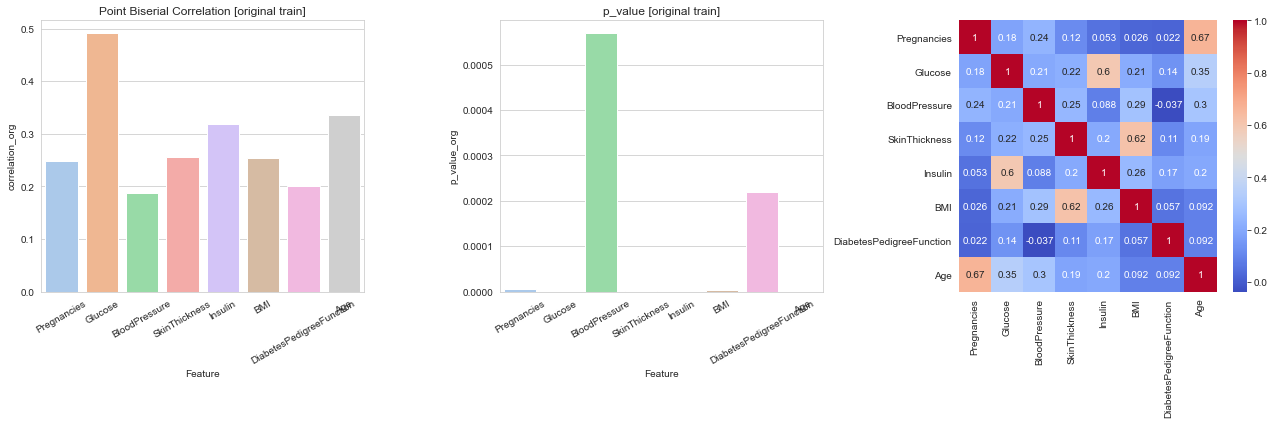

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

correlation_org_lst, correlation_dealout_lst = [], []
p_value_org_lst, p_value_dealout_lst = [], []


# 점 이연 상관계수 계산 및 출력
for feature in features_org:

    correlation_org, p_value_org = pointbiserialr(train_normal[feature], train_normal['Outcome'])
    correlation_org_lst.append(correlation_org)
    p_value_org_lst.append(p_value_org)


# 데이터프레임 생성
correlation_dict = {'Feature': features_org,
                    'correlation_org': correlation_org_lst,
                    'p_value_org' : p_value_org_lst }

correlation_df = pd.DataFrame(correlation_dict)

display(correlation_df)


plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
sns.barplot(x='Feature', y='correlation_org', data=correlation_df)
plt.gca().set_title("Point Biserial Correlation [original train]")
plt.gca().set_xticklabels(features_org, rotation=30)

plt.subplot(1,3,2)
sns.barplot(x='Feature', y='p_value_org', data=correlation_df)
plt.gca().set_xticklabels(features_org, rotation=30)
plt.gca().set_title("p_value [original train]")

plt.subplot(1,3,3)
sns.heatmap(train_normal[features_org].corr(), cmap = "coolwarm", annot= True )

plt.tight_layout()
plt.show()

## 7)  Glucose

In [54]:
x_train['binning_glucose'] = pd.cut(
    x_train['Glucose'],
    bins = [0, 100, 200],
    labels = ['normal', 'suspected'],
    right = False
)

x_test['binning_glucose'] = pd.cut(
    x_test['Glucose'],
    bins = [0, 100, 200],
    labels = ['normal', 'suspected'],
    right = False
)

## 8)  BloodPressure

### BloodPressure를 구간별 분류

### 분위수를 삳용하여 4개의 구간으로 분류

In [57]:
train['bloodpressure_cut'] = pd.qcut(x_train['BloodPressure'], q = 4, labels = ['A', 'B', 'C', 'D'])
test['bloodpressure_cut'] = pd.qcut(x_test['BloodPressure'], q = 4, labels = ['A', 'B', 'C', 'D'])

## 9) 파생변수

In [20]:
from sklearn.ensemble import RandomForestClassifier

# 피쳐 후보 생성
train_normal_try1 = train_normal.copy()

train_normal_try1['BloodPressure_BMI_Diff'] = train_normal_try1['BloodPressure'] -  train_normal_try1['BMI']
train_normal_try1['BloodPressure_BMI_Sum'] = train_normal_try1['BloodPressure'] + train_normal_try1['BMI']

train_normal_try1['BloodPressure_BMI_Ratio'] = train_normal_try1['BloodPressure'].replace(0, train_normal_try1['BMI'].median())
train_normal_try1['BloodPressure_BMI_Ratio'] = train_normal_try1['BloodPressure'] / train_normal_try1['BMI']

train_normal_try1_x = train_normal_try1.drop('Outcome', axis=1)

features_to_evaluate = ['BloodPressure_BMI_Diff', 'BloodPressure_BMI_Sum', 'BloodPressure_BMI_Ratio']

rf_model = RandomForestClassifier(random_state = 42)

# 교차 검증 성능 비교
cv_scores = {}

for feature in features_to_evaluate:
    train_normal_add_x = train_normal[features_org].copy()
    train_normal_add_x[feature] = train_normal_try1[feature]
    scores = cross_val_score(rf_model, train_normal_add_x, train_normal_y, cv=kf, scoring='accuracy')
    cv_scores[feature] = scores.mean()

display(f"accuracy : {cv_scores}")

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 832, in predict
    proba = self.predic

"accuracy : {'BloodPressure_BMI_Diff': 0.769399024670109, 'BloodPressure_BMI_Sum': 0.8023164084911073, 'BloodPressure_BMI_Ratio': nan}"

## train_normal 데이터에 feature 그룹화 통한 새로운 feature 생성하기

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.preprocessing import LabelEncoder

train_normal_try2 = train_normal.copy()

# BloodPressure의 사분위수 계산
q1 = np.percentile(train_normal_try2['BloodPressure'], 25)
q2 = np.percentile(train_normal_try2['BloodPressure'], 50)
q3 = np.percentile(train_normal_try2['BloodPressure'], 75)
q4 = np.percentile(train_normal_try2['BloodPressure'], 100)

# BloodPressure를 2개의 범주로 나누기
q_BloodPressure_lst = [ 0, q1, q4]
created_ = pd.cut(train_normal_try2['BloodPressure'], bins = q_BloodPressure_lst, labels = ['q1', 'q2'])

# LabelEncoder로 범주형 데이터 인코딩
le = LabelEncoder()
train_normal_try2['BloodPressure_cat'] = le.fit_transform(created_)

# "BloodPressure_cat" 범주에 따른 "DiabetesPedigreeFunction"의 빈도수 계산
train_normal_try2['DiabetesPedigreeFunction_by_BloodPressure_cat'] = train_normal_try2.groupby('BloodPressure_cat')['DiabetesPedigreeFunction'].transform('count')

# 범주형 변수 "BloodPressure_cat" 제거
train_normal_try2 = train_normal_try2.drop('BloodPressure_cat', axis=1)


# 피처가 추가된 데이터로 교차 검증 수행
train_normal_try2_x = train_normal_try2.drop(['ID', 'Outcome'], axis=1)

rf_model = RandomForestClassifier(random_state = 42)

# 결과 출력
cv_result_try = cross_val_score(rf_model, train_normal_try2_x, train_normal_y, cv=kf, scoring='accuracy')
display(f"accuracy : { cv_result_try.mean()}")

display(train_normal_try2.head(5))


'accuracy : 0.7993043602983362'

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,DiabetesPedigreeFunction_by_BloodPressure_cat
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0,85
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0,249
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0,249
5,TRAIN_005,3,78,50,32,88,31.0,0.248,26,1,85
6,TRAIN_006,1,91,54,25,100,25.2,0.234,23,0,85


## 새로 생성한 feature 추가하여 교차 검증 성능 확인 (2)

In [22]:
train_normal_prep = train_normal.copy()

train_normal_prep['BloodPressure_BMI_Sum'] = train_normal_try1['BloodPressure_BMI_Sum']
train_normal_prep['DiabetesPedigreeFunction_by_BloodPressure_cat'] = train_normal_try2['DiabetesPedigreeFunction_by_BloodPressure_cat']

# 점이연 상관 관계 유의성 없는 'BloodPressure', 'DiabetesPedigreeFunction' 제거
train_normal_prep = train_normal_prep.drop('BloodPressure', axis=1)
train_normal_prep = train_normal_prep.drop('DiabetesPedigreeFunction', axis=1)

train_normal_prep_x = train_normal_prep.drop(['ID','Outcome'], axis=1)

# RandomForestClassifier로 오버샘플링된 데이터에 대한 교차 검증
RF_model_prep = RandomForestClassifier(random_state=42)
cv_result_normal_prep = cross_validate(RF_model_prep, train_normal_prep_x, train_normal_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_normal_prep = pd.DataFrame(cv_result_normal_prep, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_normal_prep)
display(df_cv_result_normal_prep.describe().loc['mean',:].to_frame().T)

display(train_normal_prep_x.head(5))

,test_accuracy,test_precision,test_recall,test_f1
0,0.833333,0.809524,0.629630,0.708333
1,0.833333,0.740741,0.740741,0.740741
2,0.783133,0.722222,0.500000,0.590909
3,0.746988,0.615385,0.592593,0.603774


,test_accuracy,test_precision,test_recall,test_f1
mean,0.799197,0.721968,0.615741,0.660939


,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,BloodPressure_BMI_Sum,DiabetesPedigreeFunction_by_BloodPressure_cat
0,4,103,33,192,24.0,33,84.0,85
3,1,119,41,170,45.3,26,133.3,249
4,1,114,36,200,38.1,21,104.1,249
5,3,78,32,88,31.0,26,81.0,85
6,1,91,25,100,25.2,23,79.2,85


## test_normal 데이터에 새로운 feature 생성하기

In [23]:
test_normal = test.copy()
test_normal = test_normal.loc[test_normal['Insulin'] != 0]

# 'BloodPressure_BMI_Sum' 생성
test_normal_prep = test_normal.copy()
test_normal_prep.loc[:,'BloodPressure_BMI_Sum'] = test_normal_prep['BloodPressure'] + test_normal_prep['BMI']

# 'DiabetesPedigreeFunction_by_BloodPressure_cat' 생성
created_ = pd.cut(test_normal_prep['BloodPressure'], bins = q_BloodPressure_lst, labels = ['q1', 'q2'])

le = LabelEncoder()
test_normal_prep['BloodPressure_cat'] = le.fit_transform(created_)

# "Insulin_cat" 범주에 따른 "Glucose"의 평균 값 계산
test_normal_prep['DiabetesPedigreeFunction_by_BloodPressure_cat'] = test_normal_prep.groupby('BloodPressure_cat')['DiabetesPedigreeFunction'].transform('count')


# 불필요한 feature 제거

test_normal_prep = test_normal_prep.drop('BloodPressure_cat', axis=1)
test_normal_prep = test_normal_prep.drop('BloodPressure', axis=1)
test_normal_prep = test_normal_prep.drop('DiabetesPedigreeFunction', axis=1)

display(test_normal_prep.head(7))

,ID,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,BloodPressure_BMI_Sum,DiabetesPedigreeFunction_by_BloodPressure_cat
1,TEST_001,3,107,13,48,22.9,23,84.9,17
4,TEST_004,1,107,30,82,30.8,24,102.8,43
5,TEST_005,1,79,42,48,43.5,23,103.5,17
6,TEST_006,0,188,14,185,32.0,22,114.0,43
7,TEST_007,12,140,43,325,39.2,58,121.2,43
8,TEST_008,0,93,39,72,43.4,35,143.4,43
10,TEST_010,1,126,29,152,28.7,21,84.7,17


# 4. 모델

## 1) RandomForest에 의한 feature 중요도 확인

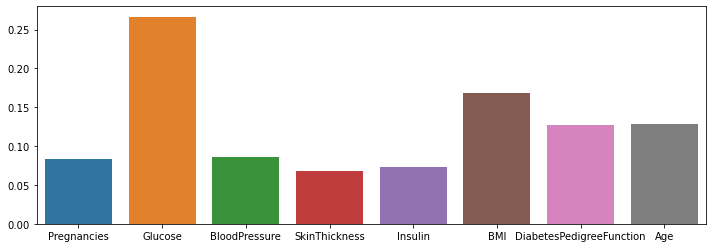

In [24]:
from sklearn.ensemble import RandomForestClassifier

features = train.columns[1:-1]
train_x = train[features]
train_y = train['Outcome']

RF_model = RandomForestClassifier(random_state = 42)
RF_model.fit(train_x,train_y)
importances = RF_model.feature_importances_ 
feature_names = RF_model.feature_names_in_ 

plt.figure(figsize=(12,4))
sns.barplot(x=feature_names, y= importances)
plt.show()

## 2) Logistic Regression에 의한 feature 중요도 확인

[0.41064840601121444,
 1.1005459492145548,
 0.23217746899517414,
 0.07139681426082255,
 0.1194697842973949,
 0.7053985615242794,
 0.34156227761695895,
 0.14579625992907141]

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

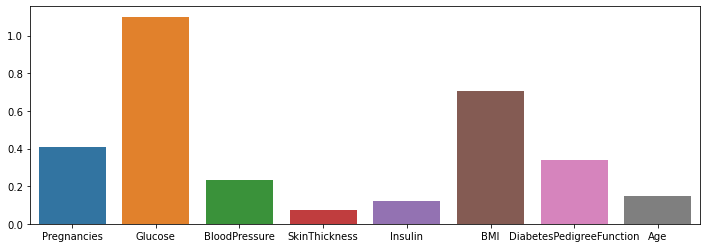

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

features = list(train.columns[1:-1])
train_x = train[features]
train_y = train['Outcome']

scaler = StandardScaler()
train_scaled_x = train_x.copy()
train_scaled_x[features] = scaler.fit_transform(train_x)

LR_model = LogisticRegression(random_state = 42, max_iter=2000)
LR_model.fit(train_scaled_x,train_y)
importances = list(np.abs(LR_model.coef_[0]))
feature_names = features

display(importances)
display(feature_names)
plt.figure(figsize=(12,4))
sns.barplot(x=feature_names, y= importances)

plt.show()

## 3) RandomForest

In [63]:
test['Insulin_Age_Sum'] = test['Insulin'] + test['Age']

test['BMI'] = test['BMI'].replace(0, test['BMI'].median())
test['Insulin_BMI_Ratio'] = test['Insulin'] / test['BMI']

test.head(5)

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_Age_Sum,Insulin_BMI_Ratio
0,TEST_000,5,112,66,0,0,37.8,0.261,41,41,0.000000
1,TEST_001,3,107,62,13,48,22.9,0.678,23,71,2.096070
2,TEST_002,3,113,44,13,0,22.4,0.140,22,22,0.000000
3,TEST_003,6,190,92,0,0,35.5,0.278,66,66,0.000000
4,TEST_004,1,107,72,30,82,30.8,0.821,24,106,2.662338


In [64]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(train_prep_x, train_prep_y)

test_x = test.drop('ID', axis=1)

pred = rf_model.predict(test_x)
submission['Outcome'] = pred

submission.to_csv("submission.csv", index = False)

In [65]:
submission.head()

,ID,Outcome
0,TEST_000,1
1,TEST_001,0
2,TEST_002,0
3,TEST_003,1
4,TEST_004,0


In [ ]:
# 0.8362068965517241